# Digit Recognizer using Voting Classifier

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import xlsxwriter

import torch.nn as nn

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
X.shape

(42000, 784)

In [7]:
a = X.iloc[4,:]

In [8]:
a_img = a.values.reshape(28,28)

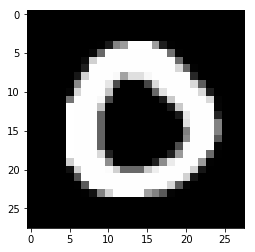

In [9]:
plt.imshow(a_img, cmap='gray')

## Random Forest Classifier

In [10]:
clf_forest = RandomForestClassifier(random_state=42)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

clf_forest.fit(X_train,y_train)
clf_forest.score(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9990476190476191

In [12]:
clf_forest.predict(X_val)
clf_forest.score(X_val,y_val)

0.9389285714285714

In [13]:
param_grid = [{'n_estimators':[30,40,50], 'max_features':[6,8,10], 'min_samples_leaf':[1,2,3]}]

grid_search = GridSearchCV(clf_forest, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [30, 40, 50], 'max_features': [6, 8, 10], 'min_samples_leaf': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [14]:
clf_forest_best = grid_search.best_estimator_

In [15]:
clf_forest_best.score(X_val,y_val)

0.9583333333333334

In [16]:
clf_extra = ExtraTreesClassifier()

In [17]:
grid_search_1 = GridSearchCV(clf_extra, param_grid, cv=5, scoring = 'neg_mean_squared_error')
grid_search_1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [30, 40, 50], 'max_features': [6, 8, 10], 'min_samples_leaf': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [18]:
clf_extra_best = grid_search_1.best_estimator_
grid_search_1.best_estimator_

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=10, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
clf_extra_best.score(X_val,y_val)

0.9572619047619048

In [20]:
df_test = pd.read_csv('test.csv')

In [21]:
preds = clf_forest_best.predict(df_test)
preds

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [22]:
y_test = pd.DataFrame(preds)

y_test.to_excel('wew.xlsx', index=False)

In [23]:
clf_v = VotingClassifier(estimators=[('forest',clf_forest_best),('extra',clf_extra_best)],voting = 'soft')
clf_v.fit(X_train,y_train)
clf_v.score(X_val,y_val)

0.9632142857142857

In [24]:
preds_1 = clf_v.predict(df_test)

In [25]:
y_test_1 = pd.DataFrame(preds_1)

y_test_1.to_excel('wew1.xlsx', index = False)